In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [36]:
df = pd.read_csv('students_weight_height.csv')
print(df.head())

   height_cm  weight_kg
0     153.22      38.23
1     150.51      38.87
2     154.65      41.75
3     151.77      39.35
4     164.74      47.87


Text(0, 0.5, 'Height (cm)')

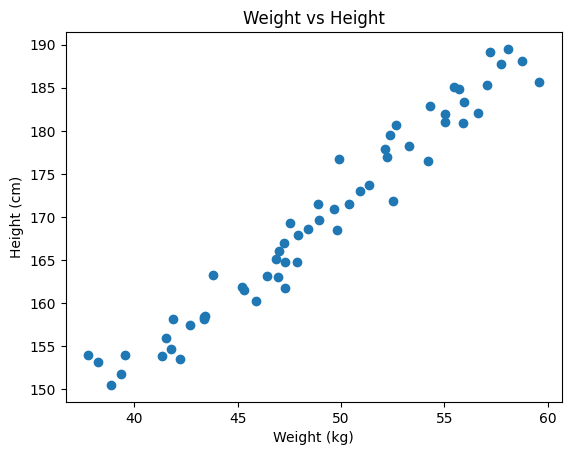

In [33]:
## Scatter Plot
plt.scatter(df['weight_kg'], df['height_cm'])
plt.title('Weight vs Height')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')

In [34]:
## finding correlation
df.corr()

,height_cm,weight_kg
height_cm,1.0000,0.9777
weight_kg,0.9777,1.0000


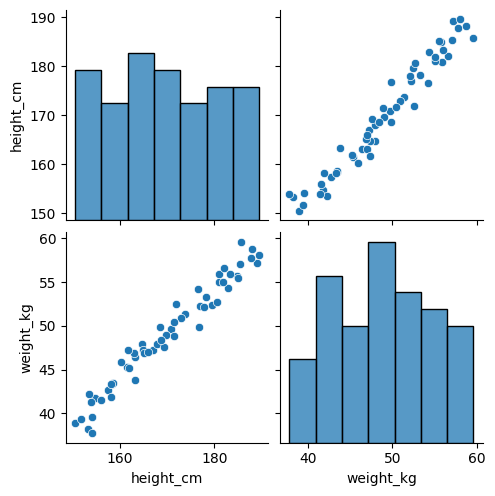

In [37]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [46]:
## Independent and Dependent Variables
df.head()
X = df[['weight_kg']]
## Independent feature must be in Dataframe or 2D array
print(X.shape)
Y = df['height_cm']
## Dependent feature can be in Series or 1D array
Y

(58, 1)


0     153.22
1     150.51
2     154.65
3     151.77
4     164.74
5     153.53
6     157.48
7     158.43
8     161.52
9     158.54
10    160.24
11    156.01
12    163.26
13    163.17
14    163.06
15    161.71
16    167.01
17    167.94
18    170.92
19    169.27
20    168.51
21    173.70
22    172.96
23    171.81
24    176.45
25    176.93
26    179.55
27    178.27
28    180.92
29    182.92
30    176.68
31    184.83
32    182.11
33    185.37
34    185.10
35    185.70
36    171.47
37    189.12
38    189.50
39    154.02
40    153.87
41    154.03
42    158.21
43    158.20
44    161.88
45    164.83
46    165.15
47    166.05
48    169.69
49    171.56
50    177.88
51    168.63
52    180.67
53    181.04
54    181.94
55    183.30
56    187.70
57    188.08
Name: height_cm, dtype: float64

In [68]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=21)
print(X_train)
print(X_test)

    weight_kg
27      53.28
54      55.02
36      48.88
48      48.95
17      47.93
56      57.76
32      56.63
51      48.39
12      43.82
52      52.66
41      39.54
16      47.26
2       41.75
25      52.20
19      47.55
6       42.67
14      46.93
49      50.38
24      54.20
5       42.22
38      58.06
33      57.06
4       47.87
3       39.35
39      37.77
37      57.19
20      49.82
26      52.39
46      46.86
21      51.35
50      52.11
31      55.71
34      55.47
7       43.37
57      58.75
11      41.54
18      49.66
43      43.36
22      50.91
8       45.31
45      47.28
15      47.29
40      41.35
    weight_kg
55      55.96
29      54.30
35      59.59
44      45.23
23      52.52
47      47.02
28      55.91
0       38.23
30      49.88
1       38.87
53      55.04
42      41.88
9       43.42
10      45.90
13      46.43


In [71]:
## Standardization
## Bringing all features to same scale
## where we find the z_score of each values in our independent features
## z_score = (x - mean) / std_dev

## we do not standarize dependent variable in simple linear regression becaue there we apply the gradient descent

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
## because we use the same mean and std_dev from training data to transform the test data
X_test = scaler.transform(X_test)
## this is done because we don not want the situation of DATA LEAKAGE, and our model should not know anything about the test data

In [72]:
## apply machine learning algorithm - linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [73]:
regression.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [92]:
print(regression.coef_)
print(regression.intercept_)

[10.96772401]
170.03302325581396


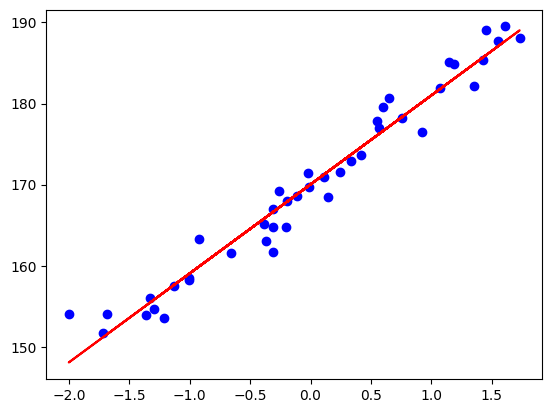

In [79]:
## plot training data and plot best fit line
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, regression.predict(X_train), color='red')

In [80]:
## predict for test data
Y_predict = regression.predict(X_test)

In [81]:
## Performance Matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
mse = mean_squared_error(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 2.31403762372914
Mean Squared Error: 8.613014583184071
Root Mean Squared Error: 2.9347937888690017


In [83]:
from sklearn.metrics import r2_score

In [84]:
score = r2_score(Y_test, Y_predict)
print("R2 Score:", score)

R2 Score: 0.9359746733255597


### Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
#### where: R2: the R2 of the model; n: no. of observations; k: no. of predictor variables

In [86]:
## Adjusted R2 Score
adj_r2 = 1 - (1 - score) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score:", adj_r2)

Adjusted R2 Score: 0.9310496481967566


### OLS Linear Regression

In [88]:
import statsmodels.api as sm

In [90]:
model = sm.OLS(Y_train, X_train).fit()
predication = model.predict(X_test)
print(predication)

[ 13.54619847  10.30615006  20.63136456  -7.397006     6.83188128
  -3.90321887  13.44860665 -21.05986074   1.67903321 -19.81068545
  11.75050899 -13.93565791 -10.92982987  -6.08927562  -5.05480234]


In [91]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              height_cm   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.020
Method:                 Least Squares   F-statistic:                             0.1747
Date:                Sat, 27 Dec 2025   Prob (F-statistic):                       0.678
Time:                        00:38:39   Log-Likelihood:                         -281.87
No. Observations:                  43   AIC:                                      565.7
Df Residuals:                      42   BIC:                                      567.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Prediction for new Data

In [105]:
regression.predict(scaler.transform([[57.76]]))  ## predict height for 70 kg weight

/Users/pramodkumar/Python/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([187.09252723])